# **HW 3: Convolutional Neural Networks**

In this homework, we will explore how to develop a simple Convolutional Neural Network for image classification. We will use the same dataset that we used in the previous exercise, the Fashion Minst. In the first part, we will learn how to develop a simple CNN, while in the second part we will explore the impact of various hyper-parameters in the learning performances.

##Exercise 3.1: Simple CNN

Let's start by importing Tensorflow, Keras and Numpy

In [0]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)

###Load dataset:
Load the Fashion Minst dataset as we did in the previous homework. As you already know Fashion Minst dataset contains grayscale images, and the task consists of classifying the images in the ten classes. As we did in HW2 we have to divide the dataset in training test and validation set. Since we will use a [2DConv](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) we have to provide also a new dimension of the input that represents the number of channels (that in ggreyscaleimage is just one). Therefore we [tf.expand_dims](https://) dim to do that. Finaly, as we did in HW2 we have to normalize the input data.

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = (
    fashion_mnist.load_data()) #The dataset is already divede in test and training..

#Normalize the data
pixel_means = X_train_full.mean(axis = 0)
pixel_stds = X_test.std(axis = 0)

X_train_full = (X_train_full - pixel_means) / pixel_stds
X_test = (X_test - pixel_means) / pixel_stds 

#Add one dimension to manage the channel
X_train_full=tf.expand_dims(X_train_full, 3) 
X_test=tf.expand_dims(X_test,3)

#Extract the first 5000 samples of the training set, to use them as the validation set
X_valid, X_train = X_train_full[:5000], X_train_full[5000:] 
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


4423680/4422102 [==============================] - 0s 0us/step


###Define the model

Let's create a simple CNN. The model will be composed of:
* One 2D convolutional layer with kernel size 3x3 and 32 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2 ([MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D))
* a Flatten layer
* the output layer,  the same we used in HW2 (that use softmax function)
Note that as 'input_shape' attribute's value in the first layer report also the third dimension that represents the channel.

In [0]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], padding="same", activation="relu", input_shape=[28, 28,1]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer='sgd',
              metrics=["accuracy"])


Print the model summary

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                62730     
Total params: 63,050
Trainable params: 63,050
Non-trainable params: 0
_________________________________________________________________


Note that the number of parameters mostly depends on the output layers, indeed the sharing parameters techinique used by the 2D convolutional layers allows to significantly reduce the number of learnable weights.
Now we can train the model

In [6]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
430/430 [==============================] - 1s 3ms/step - loss: 0.7200 - accuracy: 0.7655 - val_loss: 0.5078 - val_accuracy: 0.8322
Epoch 2/10
430/430 [==============================] - 1s 3ms/step - loss: 0.4811 - accuracy: 0.8355 - val_loss: 0.4476 - val_accuracy: 0.8486
Epoch 3/10
430/430 [==============================] - 1s 3ms/step - loss: 0.4305 - accuracy: 0.8521 - val_loss: 0.4160 - val_accuracy: 0.8564
Epoch 4/10
430/430 [==============================] - 1s 3ms/step - loss: 0.3997 - accuracy: 0.8626 - val_loss: 0.3939 - val_accuracy: 0.8654
Epoch 5/10
430/430 [==============================] - 1s 3ms/step - loss: 0.3792 - accuracy: 0.8690 - val_loss: 0.3824 - val_accuracy: 0.8664
Epoch 6/10
430/430 [==============================] - 1s 3ms/step - loss: 0.3643 - accuracy: 0.8741 - val_loss: 0.3640 - val_accuracy: 0.8760
Epoch 7/10
430/430 [==============================] - 1s 3ms/step - loss: 0.3519 - accuracy: 0.8771 - val_loss: 0.3754 - val_accuracy: 0.8664
Epoch 

Plot the loss and the accuracy trends for the training and validation set, Then compute the result on the test set.

313/313 - 1s - loss: 0.3570 - accuracy: 0.8735
accuracy: 87.35%


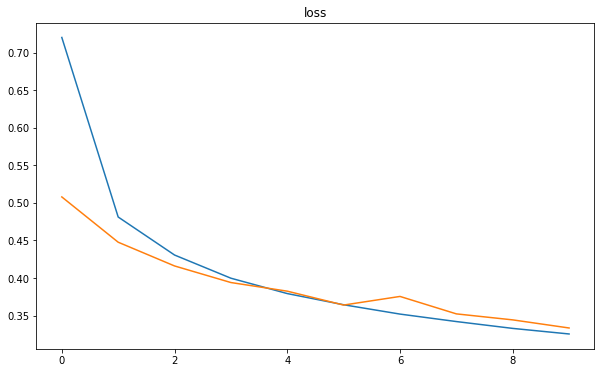

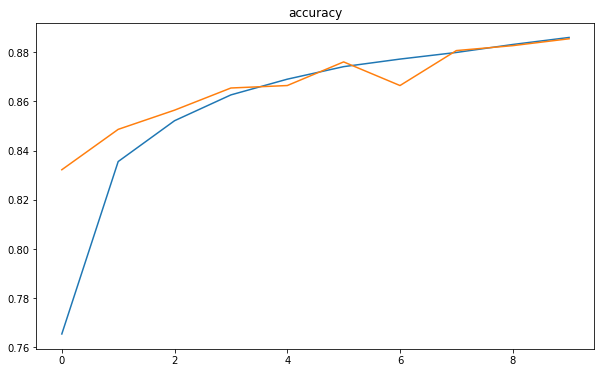

In [7]:
def plot_loss(history):
  plt.figure(figsize=(10,6))
  plt.plot(history.epoch,history.history['loss'])
  plt.plot(history.epoch,history.history['val_loss'])
  plt.title('loss')

def plot_accuracy(history):
  plt.figure(figsize=(10,6))
  plt.plot(history.epoch,history.history['accuracy'])
  plt.plot(history.epoch,history.history['val_accuracy'])
  plt.title('accuracy')

plot_loss(history)

plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))



###Visualize Weights

An interesting thing is to visualize the learned weights for the convolutional layer. We have 32 kernels of size 3x3, we can just plot them as images, mapping the weight values to grayscale.

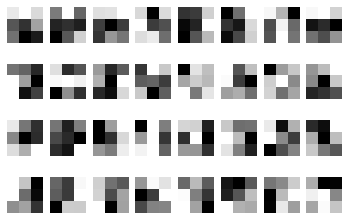

In [8]:
# Weights for the first convolutional layer
w0=model.get_weights()[0][:,:,0,:]

# Normalize to range 0.0 - 1.0
w0-=np.min(w0)
w0/=np.max(w0)

for r in range(4):
    for c in range(8):
        n=r*8+c
        plt.subplot(4, 8, n+1)
        plt.imshow(w0[:,:,n], interpolation='none')
        plt.axis('off')
        plt.gray()
plt.show()

They might be a bit hard to interpret, but it seems that the various filters have learned to detect various corners and edges.

## Exercise 3.2: Develop a better CNN
Let's develop a network that performs better than the very simple one above. This exercise aims to explore how much the various hyper-parameters influence the classification capability of the model. 

**To Complete**: Your task is to do some reparametrizations of the previous exercise's network and compare the results. At least one of them should have an improvement in the test set result (generalization) than the result of the model used in the previous exercise.
In the cell below report only the code of the **best model** that you can find. In addtion, print out its result on the test set, and plot the accuracy and the loss trends in the notebook you return.
Moreover, for each setup you test, analyze and discuss the obtained results briefly in the last cells in the bottom.

Hint: Each reparameterization should change a different aspect in the network, while the rest of the parameters would stay the same. 
Example parameters to try to change (we suggest to test at least one re-parametrization for each of these categories):

*    number of layers or neurons or filters dimension
*   activation functions
*   epochs
*   batch sizes
*   optimizer, see TensorFlow documentation on [optimizers](https://https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
*   max-pooling on/off on certain layers, or pool size

For what concerns the optimizer, as you can see in the 'compile' method [documentation'](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) is it possible to pass as 'optimizer ' attribute's value a string (the name of optimizer) or an optimizer instance.

Notice that changing the final layer's softmax activation plus the categorical_crossentropy loss requires some consideration. Don't do it unless you have a good plan.

Epoch 1/100
215/215 [==============================] - 5s 23ms/step - loss: 0.6788 - accuracy: 0.7549 - val_loss: 0.3465 - val_accuracy: 0.8752
Epoch 2/100
215/215 [==============================] - 5s 21ms/step - loss: 0.3806 - accuracy: 0.8637 - val_loss: 0.2812 - val_accuracy: 0.8976
Epoch 3/100
215/215 [==============================] - 5s 21ms/step - loss: 0.3168 - accuracy: 0.8859 - val_loss: 0.2469 - val_accuracy: 0.9084
Epoch 4/100
215/215 [==============================] - 5s 21ms/step - loss: 0.2838 - accuracy: 0.8979 - val_loss: 0.2348 - val_accuracy: 0.9112
Epoch 5/100
215/215 [==============================] - 5s 21ms/step - loss: 0.2605 - accuracy: 0.9057 - val_loss: 0.2131 - val_accuracy: 0.9198
Epoch 6/100
215/215 [==============================] - 5s 21ms/step - loss: 0.2416 - accuracy: 0.9140 - val_loss: 0.2138 - val_accuracy: 0.9204
Epoch 7/100
215/215 [==============================] - 5s 21ms/step - loss: 0.2287 - accuracy: 0.9176 - val_loss: 0.1930 - val_accuracy:

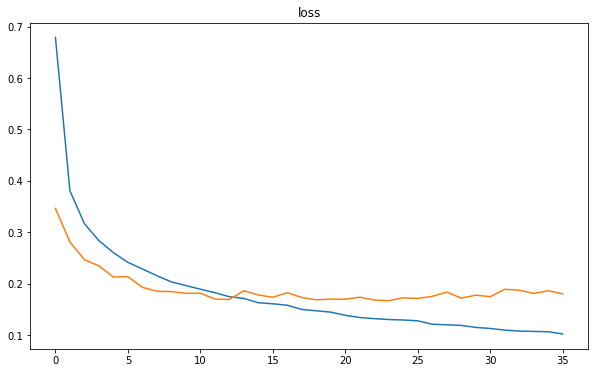

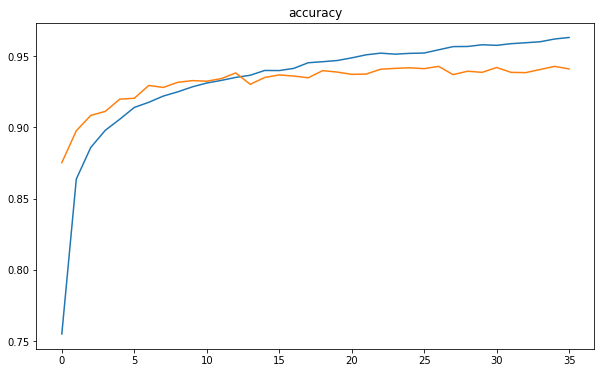

In [12]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], padding="same", activation="relu", input_shape=[28, 28,1]),
    keras.layers.Conv2D(filters=64, kernel_size=[3,3], padding="same", activation="relu"),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Dropout(0.5),
    keras.layers.Conv2D(filters=128, kernel_size=[3,3], padding="same", activation="relu"),
    keras.layers.Conv2D(filters=256, kernel_size=[3,3], padding="same", activation="relu"),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Dropout(0.5),
    keras.layers.Flatten(),
    keras.layers.Dense(500, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(200, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(),
              metrics=["accuracy"])

es = keras.callbacks.EarlyStopping(monitor="val_loss", patience=12)

history = model.fit(X_train, y_train, epochs=100, batch_size=256,
                    validation_data=(X_valid, y_valid),
                    callbacks=[es])

plot_loss(history)

plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)

### Test results discussion
The best model that I found is a CNN with 3 convolutional layers, 2 MaxPooling layers and finally 2 fully connected relu layers.

Configuration:

Conv(32 , 3 * 3) - Conv(64 , 3 * 3) - Max Pooling(2 * 2) - Conv(128 , 3 * 3 - Conv(256 , 3 * 3) - Max Pooling(2 * 2) - Dense(500 relu) - Dense(200 relu)


 - Epochs = 24
 - Batch size = 256
 - Optimizer = Adam (default parameters)
 - Dropout
 - Early stopping

The achieved accuracy in the test set is 93.86%


Discussion:
I achieved best accuracy by adding more layers to the baseline. The biggest performance difference is due to the dense layers after the convolutional and pooling layers.

In this case, Adam algorithm performed better than others.

This model tends to overfit after few epochs so I added dropout to dense and convolution layers.

However i used early stopping method to try to choose the best model monitoring the validation loss.



Besides, I also tested other models: 
* Baseline trained 20 epochs
* Baseline with batch_size=32
* Conv(64 , 3 * 3) - Max Pooling(2 * 2) - Dense(200 relu)
* Conv(64 , 4 * 4) - Max Pooling(2 * 2) - Dense(200 relu)
* Conv(64 , 3 * 3) - Max Pooling(2 * 2)- Conv(128 , 3 * 3) - Max Pooling(2 * 2) - Dense(200 relu)
* Conv(64 , 3 * 3) - Max Pooling(2 * 2) - Conv(64 , 3 * 3) - Max Pooling(2 * 2) - Dense(500 relu) - Dense(200 relu)
* Conv(64 , 3 * 3) - Max Pooling(2 * 2) - Conv(64 , 3 * 3) - Max Pooling(2 * 2) - Dense(500 relu) - Dense(200 relu)
* Conv(64 , 3 * 3) - Max Pooling(2 * 2) - Conv(128 , 3 * 3) - Max Pooling(2 * 2) - Conv(512 , 3 * 3) - Max Pooling(2 * 2) - Dense(500 relu) - Dense(200 relu)
* Conv(64 , 3 * 3) - Conv(128 , 3 * 3) - Max Pooling(2 * 2) - Conv(512 , 3 * 3) - Max Pooling(2 * 2) - Dense(500 relu) - Dense(200 relu)
* Conv(64 , 3 * 3) - Conv(128 , 3 * 3) - Max Pooling(2 * 2) - Conv(256 , 3 * 3) - Max Pooling(2 * 2) - Dense(500 relu) - Dense(200 relu)
* Conv(64 , 3 * 3) - Conv(128 , 3 * 3) - Max Pooling(2 * 2) - Conv(256 , 3 * 3) - Max Pooling(2 * 2) - Dense(2000 relu) - Dense(500 relu)
* Conv(64 , 3 * 3) - Conv(128 , 3 * 3) - Max Pooling(2 * 2) - Conv(256 , 3 * 3) - Max Pooling(2 * 2) - Dense(500 Sigmoid) - Dense(200 Sigmoid)
* Conv(32 , 3 * 3) - Conv(64 , 3 * 3) - Max Pooling(2 * 2) - Conv(128 , 3 * 3) - Max Pooling(2 * 2) - Dense(500 relu) - Dense(200 relu)
* Conv(32 , 3 * 3) - Conv(64 , 3 * 3) - Max Pooling(2 * 2) - Conv(128 , 3 * 3) - Conv(256 , 3 * 3) - Max Pooling(2 * 2) - Dense(500 relu) - Dense(200 relu)

Discussion:

 Firstly, I increased epochs from 10 to 20 and I achieved 88% accuracy.

Then I did some tests changing the Batch size. With SGD (without momentum) has been increased reducing the batch size.

At this point, my goal was to achieve better performance increasing the model complexity, so I added a dense relu layer before the output layer. The accuracy is changed to 91%.

Then I did some tests increasing the number of hidden layers, either convolutional layers or dense relu layers.

With a more complex model I used dropout and early stopping to regularize the network and avoid overfitting. 
During the tests I also tried to regularize with weight decay but this method didn't increase accuracy.

I tested a configuration with sigmoid activation function in the fully connected part without a positive result.

Finally I tested different optimizers:

* SGD with different momentum values
* Adam with defalut Keras parameters
* RMSprop with defalut Keras parameters
* Nadam with defalut Keras parameters

All of these achieve better performance than standard SGD increasing batch size.

I achieved the best result with Adam but SGD with momentum and Nadam returned almost the same results.
